K Nearest Neighbors Regression

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Not relative path - change if other user please
data = pd.read_csv('/Users/dltc2020/Documents/Senior-project/Final_Merged_Energy_and_Weather_Data_Formatted.csv')
data['BeginDate'] = pd.to_datetime(data['BeginDate'], format='%Y-%m-%d %H:%M:%S')

# Create a new column 'Previous_Day' which is one day before time
data['Previous_Day'] = data['BeginDate'] - pd.Timedelta(days=1)

# Create a new DataFrame with only 'BeginDate' and 'Nuclear' for efficient look-up
hydro_data = data[['BeginDate', 'Wood']].copy()

# Finding closest value for prev day
def get_previous_day_Wood(row, reference_df):
    # Find  closest to the 'Previous_Day'
    closest_entry = reference_df.iloc[(reference_df['BeginDate'] - row['Previous_Day']).abs().argsort()[:1]]
    if not closest_entry.empty:
        return closest_entry['Wood'].values[0]
    return None

# Apply the function to get the closest nuclear value for each row in the original data
data['Previous_Day_Wood'] = data.apply(get_previous_day_Wood, axis=1, reference_df=hydro_data)



In [3]:

# Splitting data by date: first 29 days for training, last day for testing
train_data = data[data['BeginDate'].dt.day <= 28]
test_data = data[data['BeginDate'].dt.day > 28]


In [4]:
# Define features and target
# 'Previous_Day_Nuclear',
features = [ 'Wood']

# X = data[features]
# X = data[['Nuclear']]
# y = data['Nuclear']

In [5]:
#Train,test, split
X_train = train_data[features]
Y_train = train_data['Wood']
X_test = test_data[features]
Y_test = test_data['Wood']
knn_regressor = KNeighborsRegressor(n_neighbors=6)
knn_regressor.fit(X_train, Y_train)
y_pred = knn_regressor.predict(X_test)

In [6]:
# Create a DataFrame for results
results = pd.DataFrame({
    'Actual Value': Y_test.values,
    'Predicted Value': y_pred
})

# Sort by date to have a proper timeline

# Save to CSV
results.to_csv('predicted_vs_actual.csv', index=False)

In [7]:
# Evaluate the model
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print("Percent error: ", mse / np.mean(Y_test))

Mean Squared Error (MSE): 8.500139236981306
R-squared (R2): 0.9321089984760661
Percent error:  0.030058454654313862


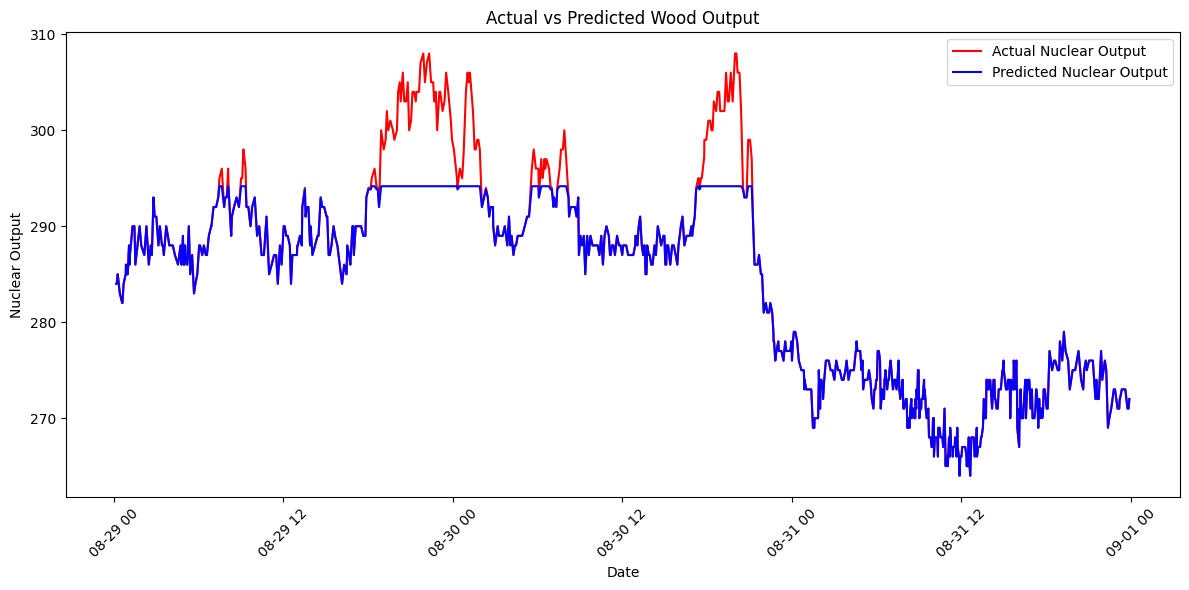

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(test_data['BeginDate'], Y_test, label='Actual Nuclear Output', color='red')
plt.plot(test_data['BeginDate'], y_pred, label='Predicted Nuclear Output', color='blue')
plt.xlabel('Date')
plt.ylabel('Nuclear Output')
plt.title('Actual vs Predicted Wood Output')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()